In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
"""
Aplicação: Algoritmo PageRank (Google)
"""
# Matriz de adjacência (quem aponta para quem)
# Páginas: A, B, C, D, E
paginas = ['A', 'B', 'C', 'D', 'E']
n_paginas = len(paginas)

# Links: A->B,C; B->C; C->A,B; D->B,C,E; E->A,D
adjacencia = np.array([
    [0, 1, 1, 0, 0],  # A aponta para B, C
    [0, 0, 1, 0, 0],  # B aponta para C
    [1, 1, 0, 0, 0],  # C aponta para A, B
    [0, 1, 1, 0, 1],  # D aponta para B, C, E
    [1, 0, 0, 1, 0]   # E aponta para A, D
])


print("Matriz de adjacência:")
print("   ", " ".join(paginas))
for i, pagina in enumerate(paginas):
    print(f"{pagina}: {adjacencia[i]}")

# Construir matriz de transição (Google Matrix)
# Normalizar por linha (probabilidade de seguir cada link)
soma_links = np.sum(adjacencia, axis=1)

# Tratar páginas sem links de saída (dangling nodes)
for i in range(n_paginas):
    if soma_links[i] == 0:
        adjacencia[i] = 1  # Aponta para todas as páginas igualmente
        soma_links[i] = n_paginas

# Matriz de transição estocástica
M = adjacencia / soma_links[:, np.newaxis]

print(f"\nMatriz de transição M:")
print(M)

# Adicionar fator de amortecimento (damping factor)
d = 0.85  # Probabilidade de seguir um link
# (1-d)/n: Probabilidade de pular para qualquer página aleatoriamente

#chance de sair da pagina
G = d * M + (1 - d) / n_paginas * np.ones((n_paginas, n_paginas))

print(f"\nGoogle Matrix G (com damping factor d={d}):")
print(G)


Matriz de adjacência:
    A B C D E
A: [0 1 1 0 0]
B: [0 0 1 0 0]
C: [1 1 0 0 0]
D: [0 1 1 0 1]
E: [1 0 0 1 0]

Matriz de transição M:
[[0.         0.5        0.5        0.         0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.5        0.5        0.         0.         0.        ]
 [0.         0.33333333 0.33333333 0.         0.33333333]
 [0.5        0.         0.         0.5        0.        ]]

Google Matrix G (com damping factor d=0.85):
[[0.03       0.455      0.455      0.03       0.03      ]
 [0.03       0.03       0.88       0.03       0.03      ]
 [0.455      0.455      0.03       0.03       0.03      ]
 [0.03       0.31333333 0.31333333 0.03       0.31333333]
 [0.455      0.03       0.03       0.455      0.03      ]]


Autovalroes: [ 1.          0.34701105 -0.425      -0.425      -0.34701105]
Autovetores:
 [[-3.96057928e-01  1.15283947e-01 -7.07106783e-01  7.07106779e-01
   7.54281271e-01]
 [-5.55477871e-01  3.61183816e-01  4.22619371e-09  4.22619328e-09
  -1.00314251e-01]
 [-7.21146710e-01  5.60019212e-01  7.07106779e-01 -7.07106783e-01
  -6.46975734e-01]
 [-8.95705769e-02 -5.70596711e-01 -1.84006708e-16  1.57248050e-16
  -3.80989410e-02]
 [-8.06658997e-02 -4.65890264e-01  2.62866726e-17 -4.32397124e-17
   3.11076551e-02]]
0
[-0.39605793 -0.55547787 -0.72114671 -0.08957058 -0.0806659 ]
[0.21490794 0.30141199 0.39130679 0.04860256 0.04377072]
1.0


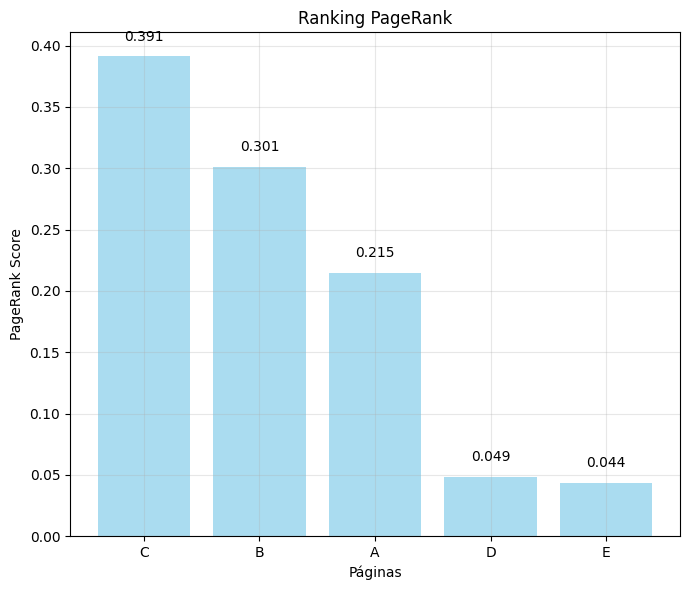

In [19]:
autovalores, autovetores = np.linalg.eig(G.T)
autovalores = np.real(autovalores)
#autovetores = np.real(autovetores)
print("Autovalroes:", autovalores)
print("Autovetores:\n", autovetores)
ind = np.argmin(np.abs(autovalores - 1))
print(ind)

p_estrela = autovetores[:, ind]

print(p_estrela)

ranking = p_estrela / p_estrela.sum()

print(ranking)
print(ranking.sum())

ranking = sorted(zip(paginas, ranking), key=lambda x: x[1], reverse=True)


# Visualizar rede e resultados
# Plot 2: Scores PageRank
fig, ax2 = plt.subplots(1, 1, figsize=(7, 6))

paginas_ordenadas = [pagina for pagina, _ in ranking]
scores_ordenados = [score for _, score in ranking]

bars = ax2.bar(paginas_ordenadas, scores_ordenados, color='skyblue', alpha=0.7)
ax2.set_xlabel('Páginas')
ax2.set_ylabel('PageRank Score')
ax2.set_title('Ranking PageRank')
ax2.grid(True, alpha=0.3)

# Adicionar valores nas barras
for bar, score in zip(bars, scores_ordenados):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()

In [20]:
np.linalg.matrix_rank(autovetores)

np.int64(5)

In [21]:
#DIagonalização
G_d = autovetores @ np.diag(autovalores) @ np.linalg.inv(autovetores)
print(G_d.real.T)

[[0.03       0.455      0.45499999 0.03       0.03      ]
 [0.03       0.02999999 0.88       0.03       0.03      ]
 [0.455      0.455      0.03       0.03       0.03      ]
 [0.03000001 0.31333335 0.31333333 0.03       0.31333333]
 [0.45499999 0.02999998 0.02999998 0.455      0.03      ]]


# Dinâmica de Epidemias

Considere uma doença que foi inserida em uma população. A cada periodo, a população é dividida em diferentes estágios da doença:

 - S: Suscetível a doença
 - I: Infectados pela doença
 - R: Recuperados (e imunes)
 - D: Mortos pela doença

Podemos denotar a população por um vetor de 4 posições que representa a fração da população em cada um dos estágios e podemos modelar a transição da doença:

- 5% dos susctíveis contraem a doença por dia
- 95% dos suscetiveis permanecem suscetiveis
- 1% dos infectados morre da doença
- 10% dos infectados se curam e adquirem imunidade
- 4% dos infectados se curam, mas não desenvolvem imunidade
- 85% dos infectados permanecem infectados
- 100% dos mortos e imunes permanecem no mesmo estado

## Modelo:

$$
x_{t+1} = A^T x_t
$$

onde $A$ é a matriz de transição dada por:

$$
A = \begin{pmatrix}
0.95 & 0.05 & 0 & 0\\
0.04 & 0.85 & 0.10 & 0.01\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\
\end{pmatrix}
$$


In [ ]:
## Analisar o modelo a longo prazo:
A = np.array([
    [0.95, 0.05, 0, 0],
    [0.04, 0.85, 0.1, 0.01],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])
autovalor, autovetor = np.linalg.eig(A.T)
print(autovalor)

# Simular Comportamento da infecção:
t = np.linspace(0, 100, 101)
x0 = np.array([1.0, 0.0, 0, 0])  # Estado inicial: 100% Suscetível, 0% Infectado, 0% Recuperado, 0% Morto
x_t = np.zeros((len(t), len(x0)))
x_t[0] = x0

for i in range(len(t) - 1):
    x_t[i + 1] = A.T @ x_t[i]


#por ter dois valores 1 nos autovalores, indicam que há dois valores absorventes


[1.         1.         0.96708204 0.83291796]


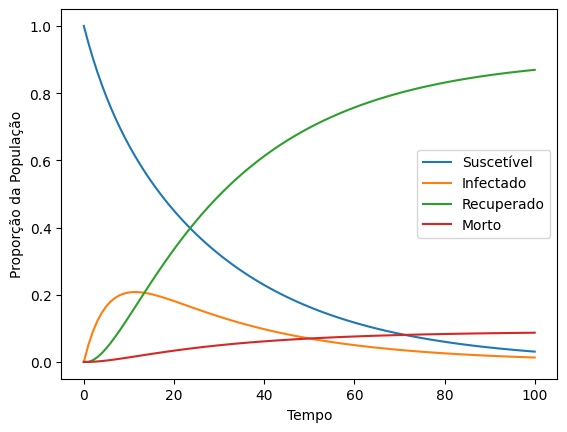

In [23]:
# plot resultado

plt.plot(t, x_t[:, 0], label='Suscetível')
plt.plot(t, x_t[:, 1], label='Infectado')
plt.plot(t, x_t[:, 2], label='Recuperado')
plt.plot(t, x_t[:, 3], label='Morto')
plt.xlabel('Tempo')
plt.ylabel('Proporção da População')
plt.legend()
plt.show()

In [ ]:
#Ver se os vetores sao li
np.linalg.matrix_rank(autovetor)

np.int64(4)

## Como estimar o número de mortos ao final da epidemia?

Simular um longo tempo pode ser custoso, é possivel estimar os numeros finais da epidemia utilizando a diagonalização

In [31]:
#para calcular a A^t com t infinito, precisamos calcular A fiagonalizavel

# A = PDP^-1
# A^k = PD^kP^-1
# D^k = diag(d1^k, d2^k, ..., dn^k)
# M^∞ = PD^∞P^-1

D_inf = np.diag([1.0, 1.0, 0, 0])
P = autovetor
A_inf = P @ D_inf @ np.linalg.inv(P)

print(A_inf)

x_final = A_inf @ x0
print("Distribuição final")
print(x_final)

[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.90909091 0.90909091 1.         0.        ]
 [0.09090909 0.09090909 0.         1.        ]]
Distribuição final
[0.         0.         0.90909091 0.09090909]


# Análise de componentes Principais (PCA)

PCA é uma das técnicas mais fundamentais em ciência de dados e aprendizado de máquina para redução de dimensionalidade. O objetivo é transformar um conjunto de dados com muitas variáveis (dimensões), possivelmente correlacionadas, em um novo conjunto de variáveis não correlacionadas, chamadas componentes principais

##### O PCA utiliza a diagonalização de uma matriz muito especial: a matriz de covariância dos dados.

Os **autovetores** da matriz de covariância são os **componentes principais**. Eles formam um novo conjunto de eixos ortogonais que apontam nas **direções de maior variância** nos dados. Os **autovalores** correspondentes indicam a **quantidade de variância** que cada componente principal captura.

Matriz de Covariância:
 [[0.75854532 0.64672278]
 [0.64672278 0.73444392]]

Autovalores (Variância explicada por cada componente): [1.39332966 0.09965958]

Autovetores (Componentes Principais - colunas):
 [[-0.71366318  0.70048902]
 [-0.70048902 -0.71366318]]


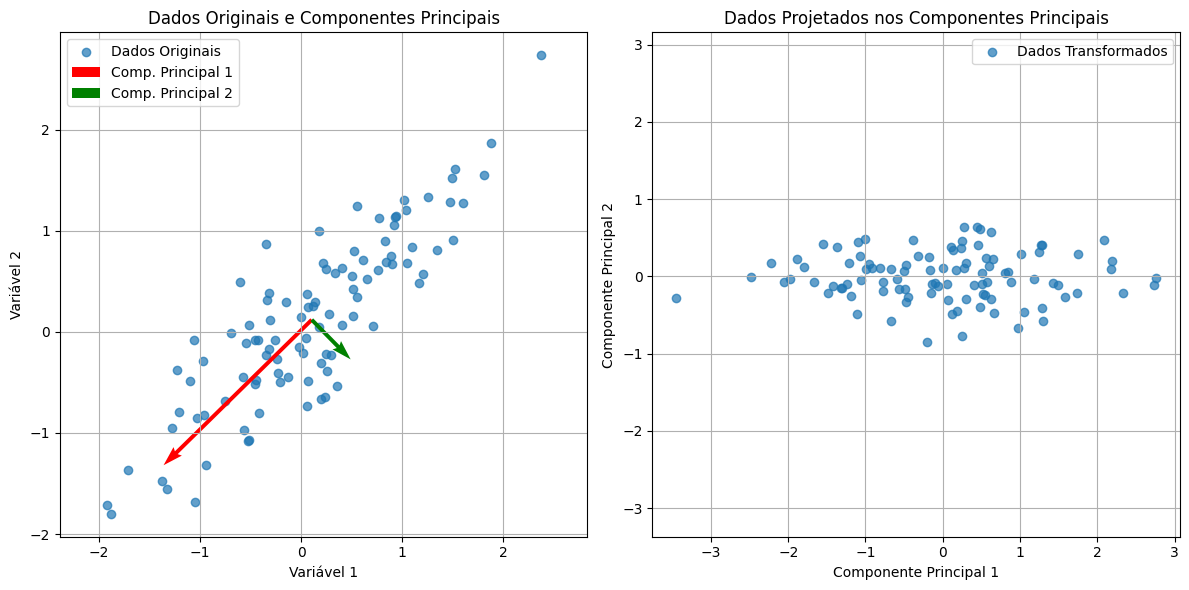

In [7]:
# 1. Gerar um conjunto de dados 2D correlacionado
np.random.seed(42)
mean = [0, 0]
cov = [[1, 0.9], [0.9, 1]]  # Matriz de covariância indica alta correlação
x, y = np.random.multivariate_normal(mean, cov, 100).T

# Juntar os dados em uma única matriz
data = np.vstack((x, y))

# 2. Calcular a matriz de covariância dos dados
# O resultado é uma matriz simétrica
cov_matrix = np.cov(data)

print("Matriz de Covariância:\n", cov_matrix)

# 3. Calcular autovalores e autovetores da matriz de covariância
# Como a matriz de covariância é simétrica, podemos usar eigh
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Ordenar autovalores e autovetores em ordem decrescente
sort_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_indices]
eigenvectors = eigenvectors[:, sort_indices]

print("\nAutovalores (Variância explicada por cada componente):", eigenvalues)
print("\nAutovetores (Componentes Principais - colunas):\n", eigenvectors)

# 4. Projetar os dados nos componentes principais
# Centralizar os dados (subtrair a média)
data_centered = data - np.mean(data, axis=1, keepdims=True)

# A matriz de transformação é a matriz de autovetores
# Cada linha da matriz transformada é um componente principal
transformed_data = eigenvectors.T @ data_centered

# 5. Visualização
plt.figure(figsize=(12, 6))

# Gráfico dos dados originais e componentes principais
plt.subplot(1, 2, 1)
plt.scatter(x, y, alpha=0.7, label='Dados Originais')
# Plotar os autovetores (escalados pelo autovalor para melhor visualização)
origin = np.mean(data, axis=1)
plt.quiver(*origin, *eigenvectors[:, 0] * np.sqrt(eigenvalues[0]), color=['r'], scale=3, label='Comp. Principal 1')
plt.quiver(*origin, *eigenvectors[:, 1] * np.sqrt(eigenvalues[1]), color=['g'], scale=3, label='Comp. Principal 2')
plt.xlabel("Variável 1")
plt.ylabel("Variável 2")
plt.title("Dados Originais e Componentes Principais")
plt.axis('equal')
plt.legend()
plt.grid(True)

# Gráfico dos dados transformados
plt.subplot(1, 2, 2)
plt.scatter(transformed_data[0, :], transformed_data[1, :], alpha=0.7, label='Dados Transformados')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Dados Projetados nos Componentes Principais")
plt.axis('equal')
plt.legend()
plt.grid(True)

plt.tight_layout()


In [8]:
"""
Análise de Risco de Portfolio de Investimentos

Use normas e desvio padrão para analisar risco e retorno de investimentos.
"""
print("\n" + "=" * 60)
print("ANÁLISE DE RISCO DE PORTFOLIO DE INVESTIMENTOS")
print("=" * 60)

# Retornos mensais (%) de 5 ativos durante 12 meses
ativos = ['Ação A', 'Ação B', 'Ação C', 'Título D', 'Fundo E']

retornos = np.array([
    [2.1, -1.5, 3.2, 0.8, 1.2],   # Mês 1
    [1.8, 2.3, -0.5, 0.9, 1.1],   # Mês 2
    [-0.5, 1.8, 2.1, 0.7, 0.9],   # Mês 3
    [3.2, -2.1, 1.8, 0.8, 1.3],   # Mês 4
    [0.9, 3.5, -1.2, 0.6, 1.0],   # Mês 5
    [2.5, 0.8, 2.8, 0.9, 1.4],    # Mês 6
    [-1.2, 2.9, 0.5, 0.7, 0.8],   # Mês 7
    [1.6, -0.8, 3.1, 0.8, 1.2],   # Mês 8
    [2.8, 1.5, -0.8, 0.6, 1.1],   # Mês 9
    [0.3, 2.7, 1.9, 0.9, 1.3],    # Mês 10
    [1.9, -1.3, 2.4, 0.7, 0.9],   # Mês 11
    [2.2, 1.1, 0.7, 0.8, 1.2]     # Mês 12
])

print("Retornos mensais (%) dos ativos:")
print(f"{'Mês':<5}", end="")
for ativo in ativos:
    print(f"{ativo:>10}", end="")
print()
   
for i in range(12):
    print(f"{i+1:<5}", end="")
    for j in range(5):
        print(f"{retornos[i,j]:>10.1f}", end="")
    print()

# Cálculo da correlação entre os ativos



ANÁLISE DE RISCO DE PORTFOLIO DE INVESTIMENTOS
Retornos mensais (%) dos ativos:
Mês      Ação A    Ação B    Ação C  Título D   Fundo E
1           2.1      -1.5       3.2       0.8       1.2
2           1.8       2.3      -0.5       0.9       1.1
3          -0.5       1.8       2.1       0.7       0.9
4           3.2      -2.1       1.8       0.8       1.3
5           0.9       3.5      -1.2       0.6       1.0
6           2.5       0.8       2.8       0.9       1.4
7          -1.2       2.9       0.5       0.7       0.8
8           1.6      -0.8       3.1       0.8       1.2
9           2.8       1.5      -0.8       0.6       1.1
10          0.3       2.7       1.9       0.9       1.3
11          1.9      -1.3       2.4       0.7       0.9
12          2.2       1.1       0.7       0.8       1.2


In [9]:
## Aplicar PCA e Ordenar os auto valores

In [10]:
# Visualizar grau de importância dos componentes principais
plt.figure(figsize=(8, 5))
cs = np.cumsum(autovalores) / np.sum(autovalores)
plt.plot(range(1, n_acoes + 1), cs, marker='o')
plt.xlabel("Componentes Principais")
plt.ylabel("Variância Explicada Acumulada")
plt.title("Importância dos Componentes Principais")


NameError: name 'n_acoes' is not defined

<Figure size 800x500 with 0 Axes>

# Exercicio
Os autovetores de M formam uma base?
Se sim, diagonalize M

In [ ]:
M = np.array(
    ([-2, 0, 0, 0], 
     [0, -2, 0, 0],
     [24, -12, 2, 0],
     [0, 0, 0, 2]))

autovalores, autovetores = np.linalg.eig(M)

if np.linalg.matrix_rank(autovetores) == M.shape[0]:
    print("Formam uma base!")

P = autovetores

D = np.diag(autovalores)
M_diag = P @ D @ np.linalg.inv(P)
print("\n\n", M_diag)

Formam uma base!


 [[ -2.   0.   0.   0.]
 [  0.  -2.   0.   0.]
 [ 24. -12.   2.   0.]
 [  0.   0.   0.   2.]]
